<a href="https://colab.research.google.com/github/Anonymous143w/TP/blob/main/bjp_vs_congress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

#Setting Fontsize ,Font weight,label weight for labels and title , figure size.
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.title_fontsize'] = 15

In [2]:
BJP = pd.read_csv("/content/bjp_tweets.csv")

CONG = pd.read_csv("/content/congress_tweets.csv")

In [3]:
BJP.head() , CONG.head()

(   Unnamed: 0                                              tweet  target
 0           0  ndtv anchor let go over to aap live press conf...       0
 1           1  sambit patra attacks rahul gandhi over his cow...       0
 2           2  crediting the bjp with taking development to s...       1
 3           3  ktrbrs do do false allegations on iasassociati...       0
 4           4  gujarat assembly yet to get rs cr as gst compe...       1,
    Unnamed: 0                                              tweet  target
 0           0  spending shocker cbo latest debt projection sh...       0
 1           1  will you vote for congress in 2024 congress co...       1
 2           2        triviapotus we need termlimits for congress       1
 3           3  eam s jaishankar hit out at congress for quad ...       0
 4           4  is this why congress supported amp celebrated ...       1)

In [6]:
# Removing unnecessary data fields.
BJP = pd.read_csv("/content/bjp_tweets.csv", usecols = ['tweet','target'])

CONG = pd.read_csv("/content/congress_tweets.csv", usecols = ['tweet','target'])


In [7]:
BJP.shape , CONG.shape

((49477, 2), (30252, 2))

In [8]:
BJP.head() , CONG.head()

(                                               tweet  target
 0  ndtv anchor let go over to aap live press conf...       0
 1  sambit patra attacks rahul gandhi over his cow...       0
 2  crediting the bjp with taking development to s...       1
 3  ktrbrs do do false allegations on iasassociati...       0
 4  gujarat assembly yet to get rs cr as gst compe...       1,
                                                tweet  target
 0  spending shocker cbo latest debt projection sh...       0
 1  will you vote for congress in 2024 congress co...       1
 2        triviapotus we need termlimits for congress       1
 3  eam s jaishankar hit out at congress for quad ...       0
 4  is this why congress supported amp celebrated ...       1)

In [9]:
print(BJP.tail(),"\n")
print(CONG.tail())

                                                   tweet  target
49472  1ddrive modispeakstonews18 loksabhaelections20...       1
49473  i am seriously worried about future of indian ...       1
49474  if narendramodi is so bad then why does incind...       0
49475  on this 23rd march pakistan day i urge all ind...       0
49476  timesofindia arvindkejriwal aap sirji pls deci...       0 

                                                   tweet  target
30247  quizzicalguy in this loksabhaelections2019 is ...       1
30248  anumavidisha rahulgandhi arvindkejriwal when s...       0
30249  sherryontopp early morning political move afte...       0
30250  mayankgandhi04 early morning political move af...       0
30251  drkumarvishwas early morning political move af...       0


In [10]:
# Inserting a new field as Party Name.
BJP.insert(0,"party_name","BJP")
CONG.insert(0,"party_name","Congress")

In [11]:
print(BJP.tail(),"\n")
print(CONG.tail())

      party_name                                              tweet  target
49472        BJP  1ddrive modispeakstonews18 loksabhaelections20...       1
49473        BJP  i am seriously worried about future of indian ...       1
49474        BJP  if narendramodi is so bad then why does incind...       0
49475        BJP  on this 23rd march pakistan day i urge all ind...       0
49476        BJP  timesofindia arvindkejriwal aap sirji pls deci...       0 

      party_name                                              tweet  target
30247   Congress  quizzicalguy in this loksabhaelections2019 is ...       1
30248   Congress  anumavidisha rahulgandhi arvindkejriwal when s...       0
30249   Congress  sherryontopp early morning political move afte...       0
30250   Congress  mayankgandhi04 early morning political move af...       0
30251   Congress  drkumarvishwas early morning political move af...       0


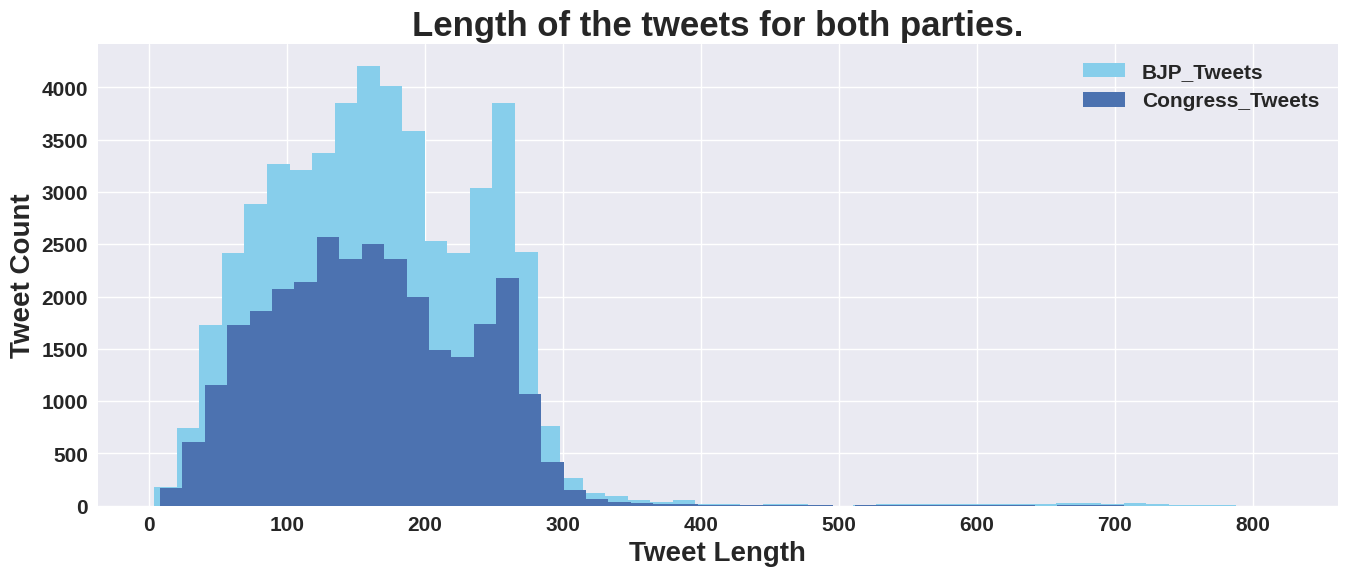

In [12]:
# Let’s view what’s the length of the Tweets in our BJP and Congress data.
length_BJP = BJP['tweet'].str.len()
length_CONG = CONG['tweet'].str.len()
plt.figure(figsize=(16,6))
plt.hist(length_BJP , bins = 50 , label ="BJP_Tweets",color = "skyblue")
plt.hist(length_CONG, bins = 50 , label = "Congress_Tweets")
plt.xlabel("Tweet Length")
plt.ylabel("Tweet Count")
plt.title("Length of the tweets for both parties.")
plt.legend()

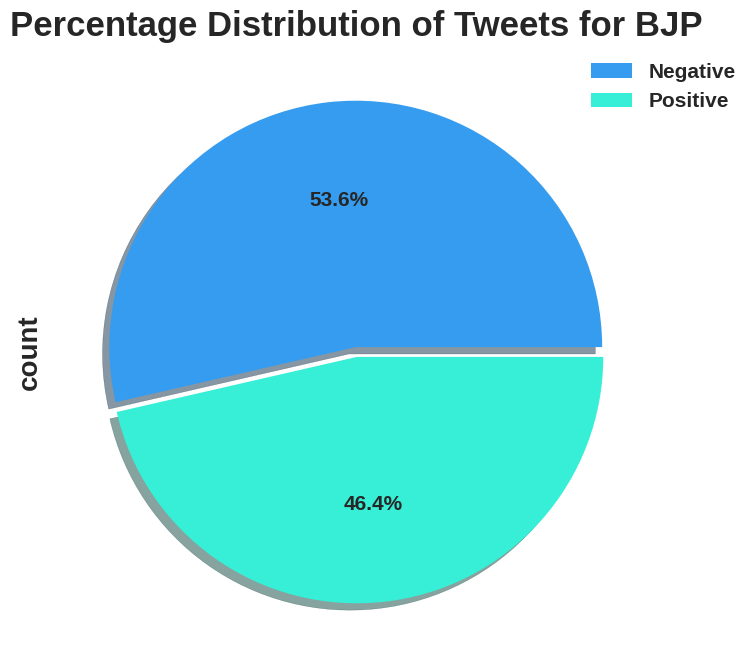

In [13]:
BJP['target'].value_counts().plot.pie(explode=(0.02,0.02),colors=['#369cef','#36efd6'],autopct='%1.1f%%',fontsize = 15,shadow=True,labels=None)
plt.title("Percentage Distribution of Tweets for BJP")
labels=BJP['target'].value_counts().index.tolist()
for i in range(len(labels)):
    # replace 0 with Positive.
    if labels[i] == 0:
        labels[i] = 'Positive'

    # replace 1 with Negative
    if labels[i] == 1:
        labels[i] = 'Negative'

plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

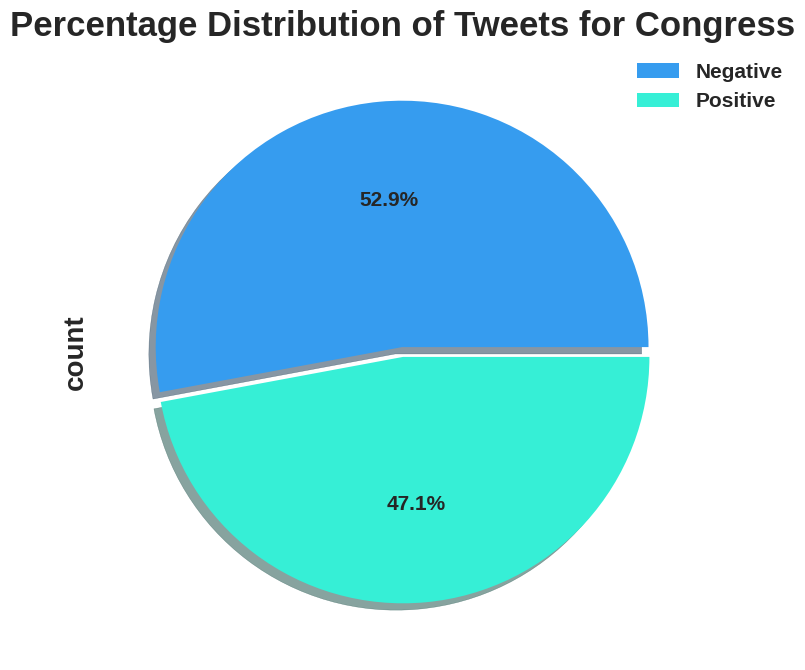

In [14]:
CONG['target'].value_counts().plot.pie(explode=(0.02,0.02),colors=['#369cef','#36efd6'],autopct='%1.1f%%',fontsize = 15,shadow=True,labels=None)
plt.title("Percentage Distribution of Tweets for Congress")
labels=CONG['target'].value_counts().index.tolist()
for i in range(len(labels)):
    # replace 0 with Positive.
    if labels[i] == 0:
        labels[i] = 'Positive'

    # replace 1 with Negative
    if labels[i] == 1:
        labels[i] = 'Negative'

plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

In [15]:
# Remove Short Words.
BJP['clean_tweet'] = BJP['tweet'].apply(lambda x : " ".join([word for word in x.split() if len(word)>3]))
CONG['clean_tweet'] = CONG['tweet'].apply(lambda x : " ".join([word for word in x.split() if len(word)>3]))

In [19]:
BJP.head() , CONG.head()

(  party_name                                              tweet  target  \
 0        BJP  ndtv anchor let go over to aap live press conf...       0   
 1        BJP  sambit patra attacks rahul gandhi over his cow...       0   
 2        BJP  crediting the bjp with taking development to s...       1   
 3        BJP  ktrbrs do do false allegations on iasassociati...       0   
 4        BJP  gujarat assembly yet to get rs cr as gst compe...       1   
 
                                          clean_tweet  
 0  ndtv anchor over live press conference next th...  
 1  sambit patra attacks rahul gandhi over cowardi...  
 2  crediting with taking development smaller citi...  
 3  ktrbrs false allegations iasassociation smart ...  
 4  gujarat assembly compensation says minister ar...  ,
   party_name                                              tweet  target  \
 0   Congress  spending shocker cbo latest debt projection sh...       0   
 1   Congress  will you vote for congress in 2024 con

In [20]:
# Individual Words Considered as tokens.
tokenized_tweet_bjp = BJP['clean_tweet'].apply(lambda x : x.split())
tokenized_tweet_cong = CONG['clean_tweet'].apply(lambda x : x.split())

In [21]:
tokenized_tweet_bjp.head() , tokenized_tweet_cong.head()

(0    [ndtv, anchor, over, live, press, conference, ...
 1    [sambit, patra, attacks, rahul, gandhi, over, ...
 2    [crediting, with, taking, development, smaller...
 3    [ktrbrs, false, allegations, iasassociation, s...
 4    [gujarat, assembly, compensation, says, minist...
 Name: clean_tweet, dtype: object,
 0    [spending, shocker, latest, debt, projection, ...
 1    [will, vote, congress, 2024, congress, congres...
 2            [triviapotus, need, termlimits, congress]
 3    [jaishankar, congress, quad, reluctance, rahul...
 4    [this, congress, supported, celebrated, arrest...
 Name: clean_tweet, dtype: object)

In [22]:
# Stem the words.
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet_bjp = tokenized_tweet_bjp.apply(lambda sentence : [stemmer.stem(word) for word in sentence])
tokenized_tweet_cong = tokenized_tweet_cong.apply(lambda sentence : [stemmer.stem(word) for word in sentence])

In [23]:
tokenized_tweet_bjp.head() , tokenized_tweet_cong.head()

(0    [ndtv, anchor, over, live, press, confer, next...
 1    [sambit, patra, attack, rahul, gandhi, over, c...
 2    [credit, with, take, develop, smaller, citi, t...
 3    [ktrbr, fals, alleg, iasassoci, smart, kapilsi...
 4    [gujarat, assembl, compens, say, minist, arjun...
 Name: clean_tweet, dtype: object,
 0    [spend, shocker, latest, debt, project, should...
 1    [will, vote, congress, 2024, congress, congres...
 2              [triviapotu, need, termlimit, congress]
 3    [jaishankar, congress, quad, reluct, rahul, ga...
 4    [thi, congress, support, celebr, arrest, manis...
 Name: clean_tweet, dtype: object)

In [24]:
# Combine words into single sentence.
for i in range(len(tokenized_tweet_bjp)):
    tokenized_tweet_bjp[i] = " ".join(tokenized_tweet_bjp[i])
for i in range(len(tokenized_tweet_cong)):
    tokenized_tweet_cong[i] = " ".join(tokenized_tweet_cong[i])

In [25]:
tokenized_tweet_bjp.head() , tokenized_tweet_cong.head()

(0    ndtv anchor over live press confer next thing ...
 1    sambit patra attack rahul gandhi over cowardic...
 2    credit with take develop smaller citi town pmm...
 3    ktrbr fals alleg iasassoci smart kapilsib pbhu...
 4    gujarat assembl compens say minist arjunmodhwa...
 Name: clean_tweet, dtype: object,
 0    spend shocker latest debt project should stun ...
 1    will vote congress 2024 congress congresssanka...
 2                   triviapotu need termlimit congress
 3    jaishankar congress quad reluct rahul gandhi g...
 4    thi congress support celebr arrest manishsisod...
 Name: clean_tweet, dtype: object)

In [26]:
BJP['clean_tweet'] = tokenized_tweet_bjp
CONG['clean_tweet'] = tokenized_tweet_cong

In [27]:
BJP.head() , CONG.head()

(  party_name                                              tweet  target  \
 0        BJP  ndtv anchor let go over to aap live press conf...       0   
 1        BJP  sambit patra attacks rahul gandhi over his cow...       0   
 2        BJP  crediting the bjp with taking development to s...       1   
 3        BJP  ktrbrs do do false allegations on iasassociati...       0   
 4        BJP  gujarat assembly yet to get rs cr as gst compe...       1   
 
                                          clean_tweet  
 0  ndtv anchor over live press confer next thing ...  
 1  sambit patra attack rahul gandhi over cowardic...  
 2  credit with take develop smaller citi town pmm...  
 3  ktrbr fals alleg iasassoci smart kapilsib pbhu...  
 4  gujarat assembl compens say minist arjunmodhwa...  ,
   party_name                                              tweet  target  \
 0   Congress  spending shocker cbo latest debt projection sh...       0   
 1   Congress  will you vote for congress in 2024 con

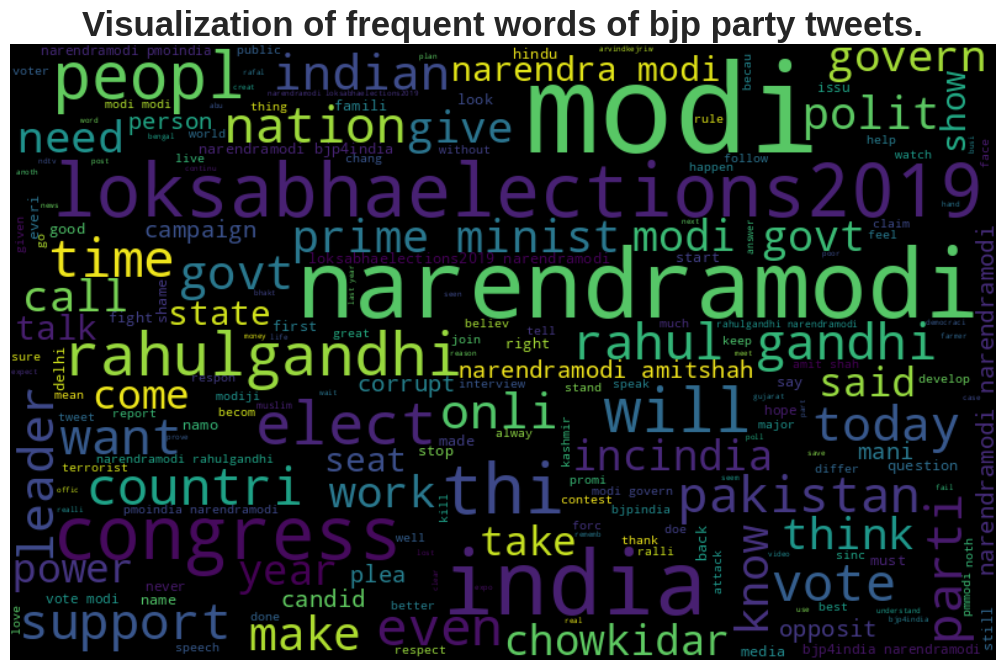

In [28]:
# It Will combine all sentences into a single string.
all_words = " ".join([sentence for sentence in BJP['clean_tweet']])

# visualize The Frequent Words.
wordcloud = WordCloud(width = 800 , height = 500 , random_state = 42 , max_font_size = 100).generate(all_words)

# plot the graph.
plt.figure(figsize = (16,8))
plt.imshow(wordcloud , interpolation = "bilinear")
plt.title("Visualization of frequent words of bjp party tweets.")
plt.axis("off")
plt.show()

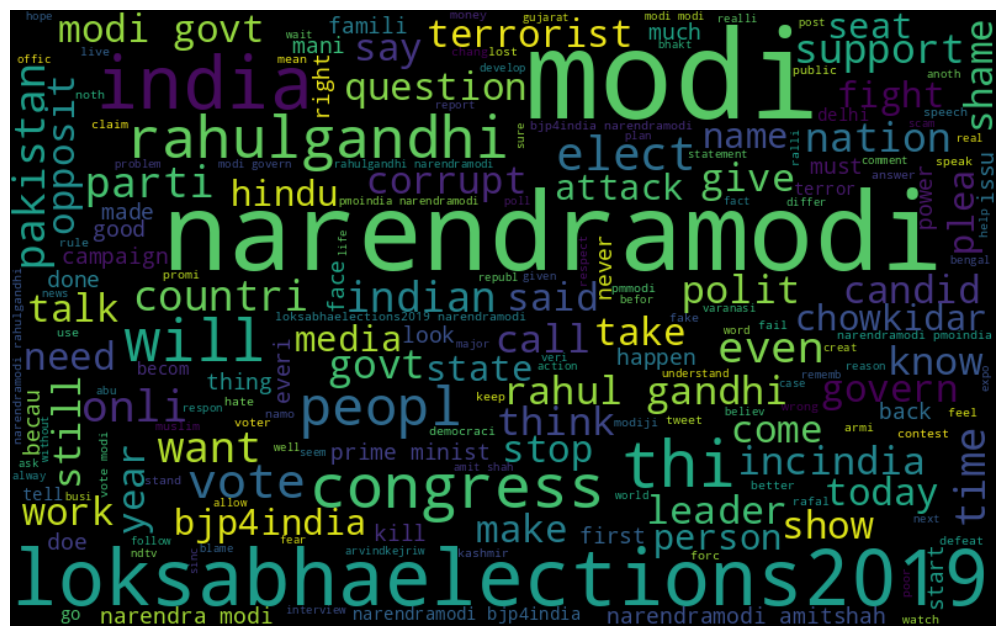

In [29]:
# Frequent Words Visualization For Positive Words.
all_words = " ".join([sentence for sentence in BJP['clean_tweet'][BJP['target']==0]])

# visualize The Frequent Words.
wordcloud = WordCloud(width = 800 , height = 500 , random_state = 42 , max_font_size = 100).generate(all_words)

# plot the graph.
plt.figure(figsize = (16,8))
plt.imshow(wordcloud , interpolation = "bilinear")
plt.axis("off")
plt.show()

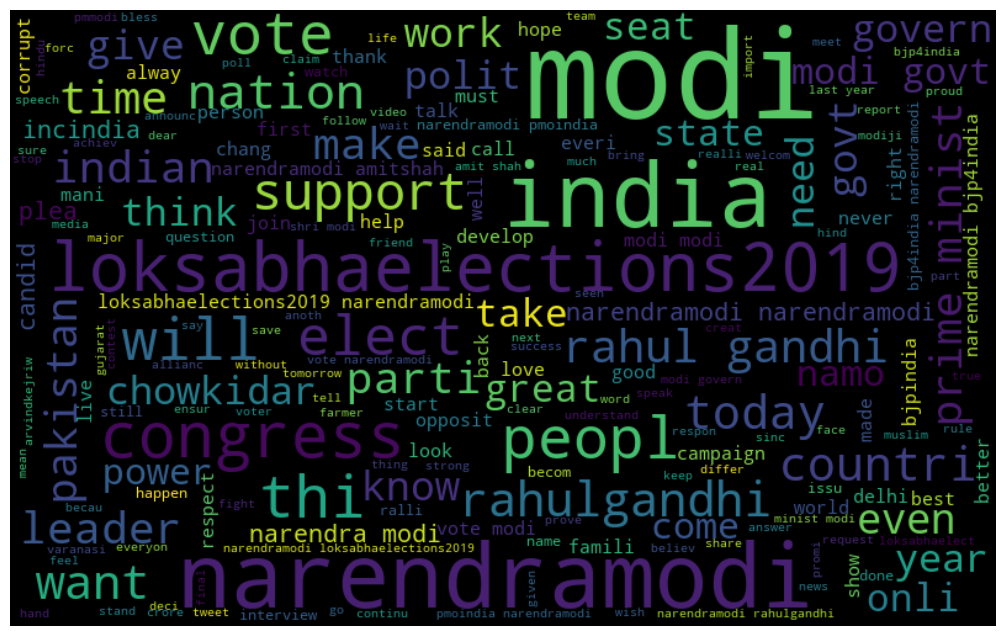

In [ ]:
# Frequent Words Visualization For Negative Words.
all_words = " ".join([sentence for sentence in BJP['clean_tweet'][BJP['target']==1]])

# visualize The Frequent Words.
wordcloud = WordCloud(width = 800 , height = 500 , random_state = 42 , max_font_size = 100).generate(all_words)

# plot the graph.
plt.figure(figsize = (16,8))
plt.imshow(wordcloud , interpolation = "bilinear")
plt.axis("off")
plt.show()

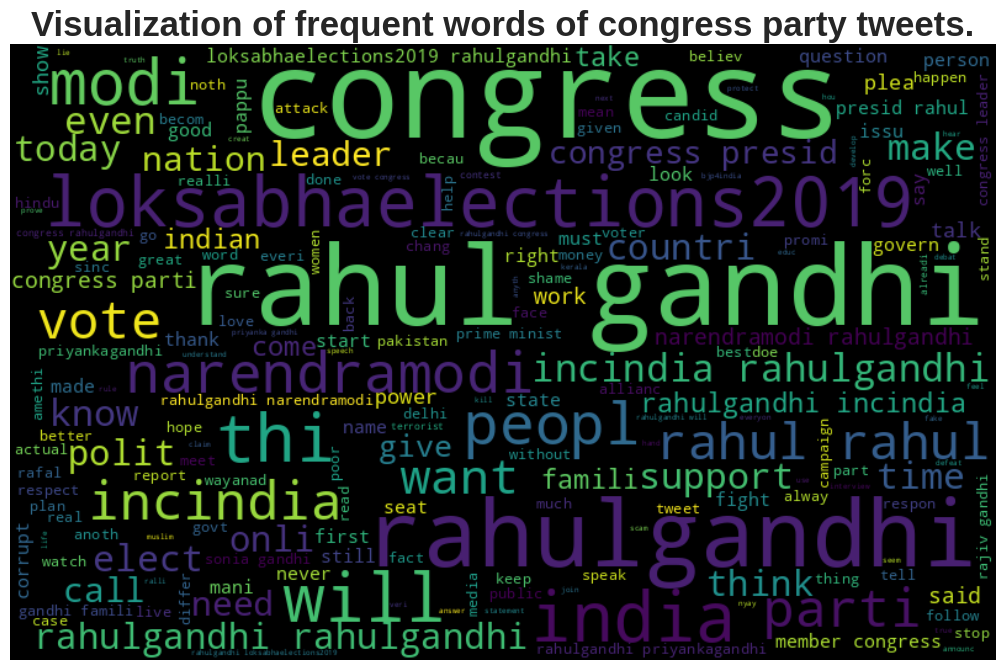

In [30]:
# It Will combine all sentences into a single string.
all_words = " ".join([sentence for sentence in CONG['clean_tweet']])

# visualize The Frequent Words.
wordcloud = WordCloud(width = 800 , height = 500 , random_state = 42 , max_font_size = 100).generate(all_words)

# plot the graph.
plt.figure(figsize = (16,8))
plt.imshow(wordcloud , interpolation = "bilinear")
plt.title("Visualization of frequent words of congress party tweets.")
plt.axis("off")
plt.show()

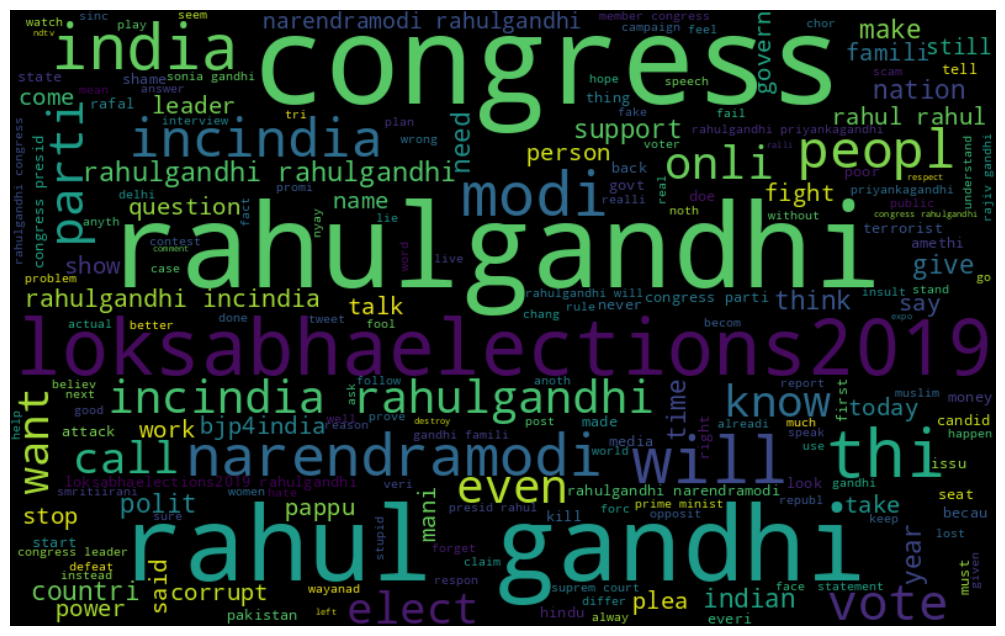

In [31]:
# Frequent Words Visualization For Positive Words.
all_words = " ".join([sentence for sentence in CONG['clean_tweet'][CONG['target']==0]])

# visualize The Frequent Words.
wordcloud = WordCloud(width = 800 , height = 500 , random_state = 42 , max_font_size = 100).generate(all_words)

# plot the graph.
plt.figure(figsize = (16,8))
plt.imshow(wordcloud , interpolation = "bilinear")
plt.axis("off")
plt.show()

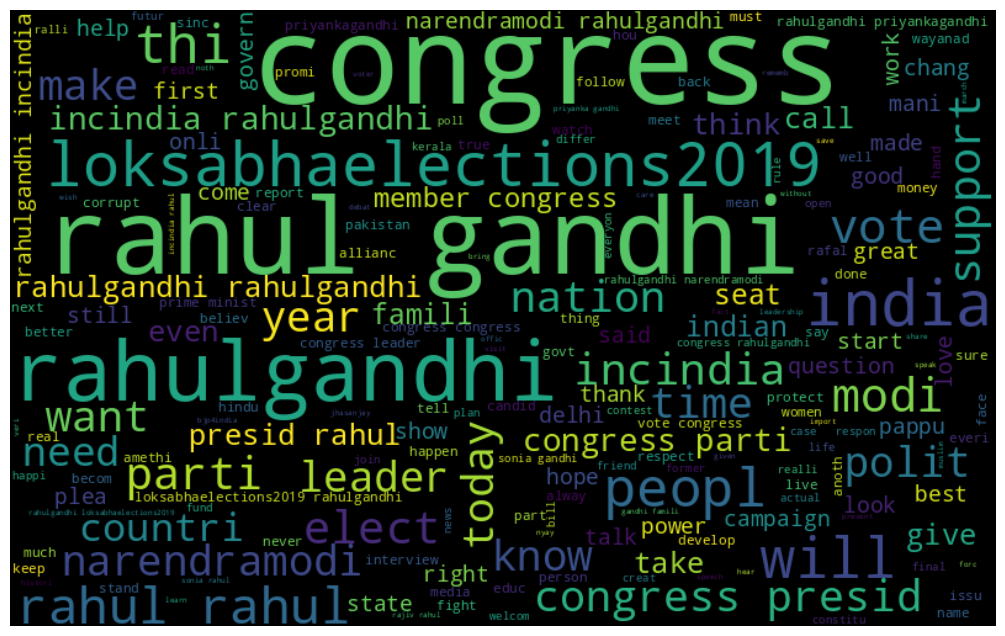

In [32]:
# Frequent Words Visualization For Negative Words.
all_words = " ".join([sentence for sentence in CONG['clean_tweet'][CONG['target']==1]])

# visualize The Frequent Words.
wordcloud = WordCloud(width = 800 , height = 500 , random_state = 42 , max_font_size = 100).generate(all_words)

# plot the graph.
plt.figure(figsize = (16,8))
plt.imshow(wordcloud , interpolation = "bilinear")
plt.axis("off")
plt.show()

# HuggingFace's transformers library.

In [33]:
BJP.head()

,party_name,tweet,target,clean_tweet
0,BJP,ndtv anchor let go over to aap live press conf...,0,ndtv anchor over live press confer next thing ...
1,BJP,sambit patra attacks rahul gandhi over his cow...,0,sambit patra attack rahul gandhi over cowardic...
2,BJP,crediting the bjp with taking development to s...,1,credit with take develop smaller citi town pmm...
3,BJP,ktrbrs do do false allegations on iasassociati...,0,ktrbr fals alleg iasassoci smart kapilsib pbhu...
4,BJP,gujarat assembly yet to get rs cr as gst compe...,1,gujarat assembl compens say minist arjunmodhwa...


In [34]:
BJP.reset_index(inplace=True)

In [35]:
BJP = BJP.head(1000)

In [36]:
# using HuggingFace's transformers library to perform sentiment analysis on political tweets:
import torch
from transformers import pipeline, set_seed
from tqdm.notebook import tqdm

set_seed(42)
sentiment_pipeline = pipeline("sentiment-analysis")

result = {}
for i, row in tqdm(BJP.iterrows(), total=len(BJP)):
    try:
        text = row['tweet']
        myid = row['index']
        result[myid] = sentiment_pipeline(text)[0]['label']
    except RuntimeError:
        print(f'Broke for id {myid}')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [37]:
# Converting Dictionary values into dataframe.
transformer_bjp = pd.DataFrame([result]).T
transformer_bjp.head()

,0
0,NEGATIVE
1,NEGATIVE
2,POSITIVE
3,NEGATIVE
4,NEGATIVE


In [38]:
BJP['label'] = transformer_bjp[0]

In [ ]:
# observation between Target column and label column for head 5 tweets
BJP.head()

,index,party_name,tweet,target,clean_tweet,label
0,0,BJP,ndtv anchor let go over to aap live press conf...,0,ndtv anchor over live press confer next thing ...,NEGATIVE
1,1,BJP,sambit patra attacks rahul gandhi over his cow...,0,sambit patra attack rahul gandhi over cowardic...,NEGATIVE
2,2,BJP,crediting the bjp with taking development to s...,1,credit with take develop smaller citi town pmm...,POSITIVE
3,3,BJP,ktrbrs do do false allegations on iasassociati...,0,ktrbr fals alleg iasassoci smart kapilsib pbhu...,NEGATIVE
4,4,BJP,gujarat assembly yet to get rs cr as gst compe...,1,gujarat assembl compens say minist arjunmodhwa...,NEGATIVE


In [39]:
# observation between Target column and label column for tail 5 tweets
BJP.tail()

,index,party_name,tweet,target,clean_tweet,label
995,995,BJP,aap mp sanjay singh describes the arrest of ma...,0,sanjay singh describ arrest manish sisodia hei...,NEGATIVE
996,996,BJP,there was no corruption in delhi but for past ...,0,there corrupt delhi past year under congress r...,NEGATIVE
997,997,BJP,rahulgandhi is a fascist bjp supporter he is s...,0,rahulgandhi fascist support say after articl a...,NEGATIVE
998,998,BJP,narendramodi bjp4india many we voted u for hop...,0,narendramodi bjp4india mani vote hope ach fail...,NEGATIVE
999,999,BJP,nizambad mp arvind dharmapuri attended praja g...,1,nizambad arvind dharmapuri attend praja gosa b...,POSITIVE


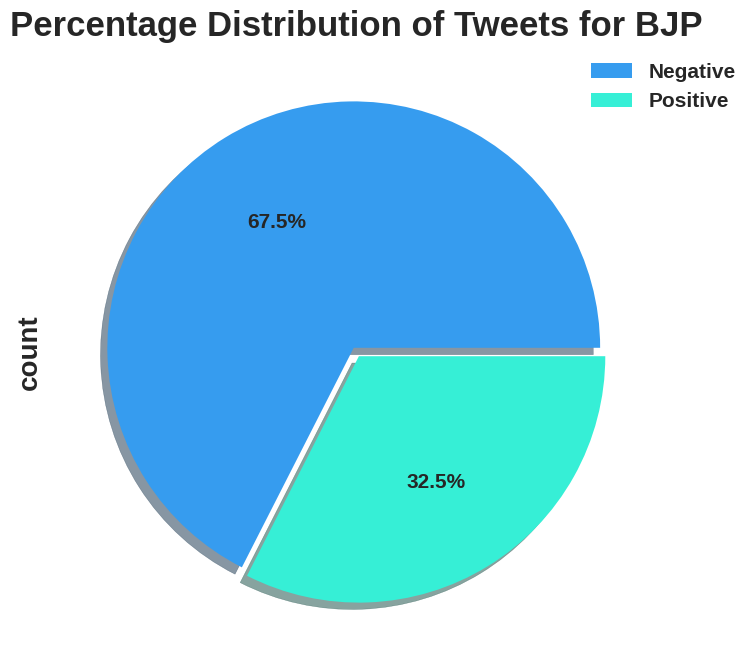

In [40]:
BJP['target'].value_counts().plot.pie(explode=(0.02,0.02),colors=['#369cef','#36efd6'],autopct='%1.1f%%',fontsize = 15,shadow=True,labels=None)
plt.title("Percentage Distribution of Tweets for BJP")
labels=BJP['target'].value_counts().index.tolist()
for i in range(len(labels)):
    # replace 0 with Positive.
    if labels[i] == 0:
        labels[i] = 'Positive'

    # replace 1 with Negative
    if labels[i] == 1:
        labels[i] = 'Negative'

plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

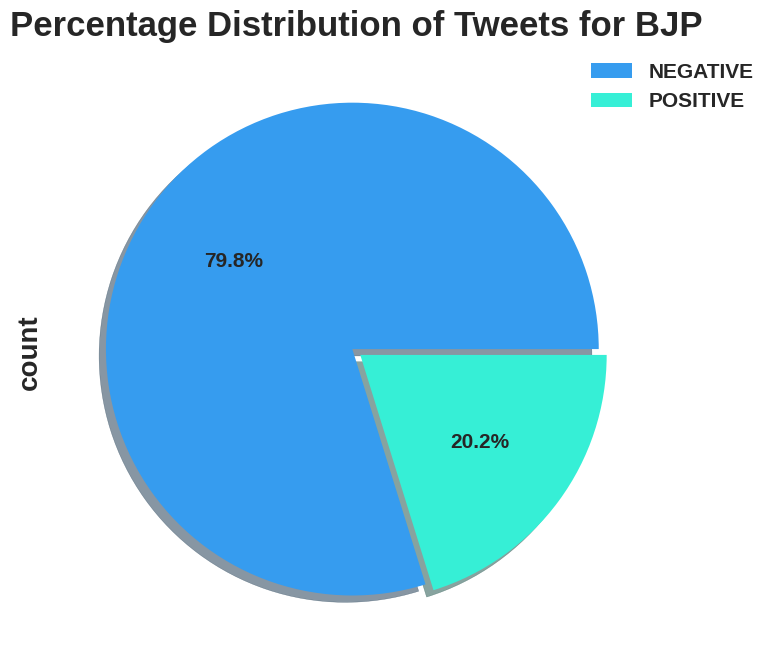

In [41]:
BJP['label'].value_counts().plot.pie(explode=(0.02,0.02),colors=['#369cef','#36efd6'],autopct='%1.1f%%',fontsize = 15,shadow=True,labels=None)
plt.title("Percentage Distribution of Tweets for BJP")
labels=BJP['label'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

In [42]:
CONG.reset_index(inplace=True)

In [43]:
CONG = CONG.head(1000)
CONG.head()

,index,party_name,tweet,target,clean_tweet
0,0,Congress,spending shocker cbo latest debt projection sh...,0,spend shocker latest debt project should stun ...
1,1,Congress,will you vote for congress in 2024 congress co...,1,will vote congress 2024 congress congresssanka...
2,2,Congress,triviapotus we need termlimits for congress,1,triviapotu need termlimit congress
3,3,Congress,eam s jaishankar hit out at congress for quad ...,0,jaishankar congress quad reluct rahul gandhi g...
4,4,Congress,is this why congress supported amp celebrated ...,1,thi congress support celebr arrest manishsisod...


In [44]:
result = {}
for i, row in tqdm(CONG.iterrows(), total=len(CONG)):
    try:
        text = row['tweet']
        myid = row['index']
        result[myid] = sentiment_pipeline(text)[0]['label']
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

In [45]:
# Converting Dictionary values into dataframe.
transformer_cong = pd.DataFrame([result]).T
transformer_cong.head()

,0
0,NEGATIVE
1,POSITIVE
2,NEGATIVE
3,NEGATIVE
4,NEGATIVE


In [46]:
CONG['label'] = transformer_cong[0]

In [47]:
# observation between Target column and label column for head 5 tweets
CONG.head()

,index,party_name,tweet,target,clean_tweet,label
0,0,Congress,spending shocker cbo latest debt projection sh...,0,spend shocker latest debt project should stun ...,NEGATIVE
1,1,Congress,will you vote for congress in 2024 congress co...,1,will vote congress 2024 congress congresssanka...,POSITIVE
2,2,Congress,triviapotus we need termlimits for congress,1,triviapotu need termlimit congress,NEGATIVE
3,3,Congress,eam s jaishankar hit out at congress for quad ...,0,jaishankar congress quad reluct rahul gandhi g...,NEGATIVE
4,4,Congress,is this why congress supported amp celebrated ...,1,thi congress support celebr arrest manishsisod...,NEGATIVE


In [48]:
# observation between Target column and label column for tail 5 tweets
CONG.tail()

,index,party_name,tweet,target,clean_tweet,label
995,995,Congress,soniagandhi announces retirement from politics...,1,soniagandhi announc retir from polit sacrif ho...,POSITIVE
996,996,Congress,incplenaryincg himachal cm sukhvindersinghsukh...,0,incplenaryincg himach sukhvindersinghsukhu sai...,NEGATIVE
997,997,Congress,joebiden if congress passes a national abortio...,0,joebiden congress pass nation abort they need ...,NEGATIVE
998,998,Congress,senior congress leader shashi tharoor on satur...,1,senior congress leader shashi tharoor saturday...,POSITIVE
999,999,Congress,waglenikhil kanhaiyakumar he is anti national ...,0,waglenikhil kanhaiyakumar anti nation heard wa...,POSITIVE


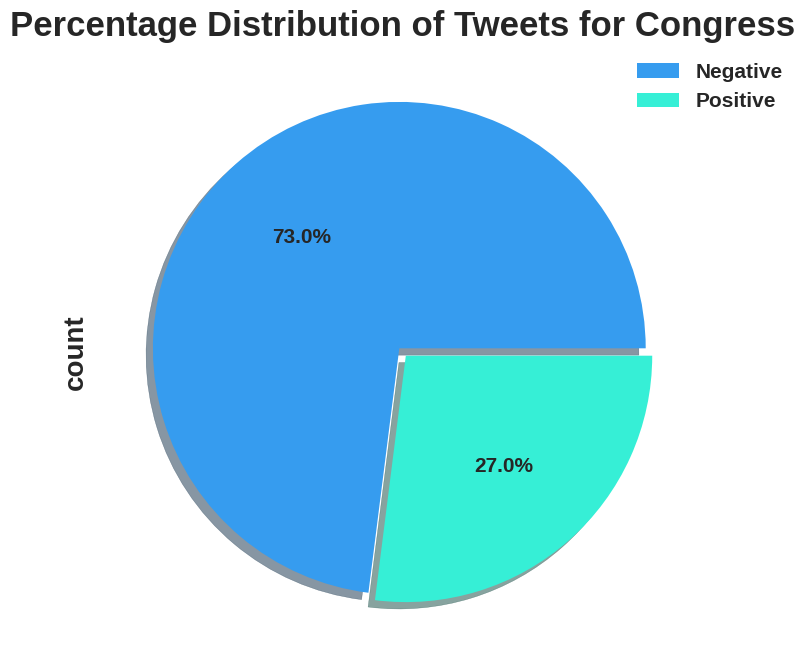

In [49]:
CONG['target'].value_counts().plot.pie(explode=(0.02,0.02),colors=['#369cef','#36efd6'],autopct='%1.1f%%',fontsize = 15,shadow=True,labels=None)
plt.title("Percentage Distribution of Tweets for Congress")
labels=CONG['target'].value_counts().index.tolist()
for i in range(len(labels)):
    # replace 0 with Positive.
    if labels[i] == 0:
        labels[i] = 'Positive'

    # replace 1 with Negative
    if labels[i] == 1:
        labels[i] = 'Negative'

plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

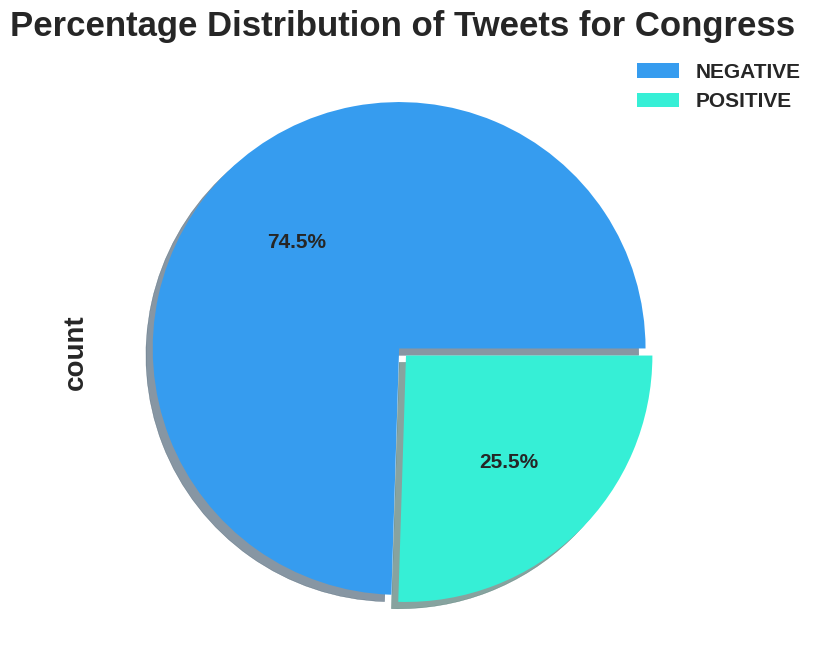

In [50]:
CONG['label'].value_counts().plot.pie(explode=(0.02,0.02),colors=['#369cef','#36efd6'],autopct='%1.1f%%',fontsize = 15,shadow=True,labels=None)
plt.title("Percentage Distribution of Tweets for Congress")
labels=CONG['label'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()

In [117]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [118]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [121]:
# Load datasets
bjp_tweets = pd.read_csv('/content/bjp_tweets.csv', usecols=['tweet', 'target'])
congress_tweets = pd.read_csv('/content/congress_tweets.csv', usecols=['tweet', 'target'])


In [123]:
data = pd.concat([bjp_tweets, congress_tweets])


In [124]:
# Preprocess tweets
def preprocess_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)     # Remove mentions
    tweet = re.sub(r'#\w+', '', tweet)     # Remove hashtags
    tweet = re.sub(r'\d+', '', tweet)      # Remove numbers
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove punctuation
    tweet = tweet.lower()                  # Convert to lowercase
    return tweet

data['tweet'] = data['tweet'].apply(preprocess_tweet)


In [125]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['target'], test_size=0.2, random_state=42)

# Build and train a model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

In [126]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [127]:
# Evaluate the model
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8121158911325724
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79      7405
           1       0.81      0.84      0.83      8541

    accuracy                           0.81     15946
   macro avg       0.81      0.81      0.81     15946
weighted avg       0.81      0.81      0.81     15946



In [129]:
# Sentiment analysis
sid = SentimentIntensityAnalyzer()

def get_sentiment(tweet):
    scores = sid.polarity_scores(tweet)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['tweet'].apply(get_sentiment)

In [135]:
# User input function
def classify_tweet(user_tweet):
    processed_tweet = preprocess_tweet(user_tweet)
    party_prediction = pipeline.predict([processed_tweet])[0]
    sentiment_prediction = get_sentiment(processed_tweet)
    return party_prediction, sentiment_prediction

user_tweet = input("Enter a tweet: ")
party, sentiment = classify_tweet(user_tweet)
print(f"The tweet is related to: {party}")
print(f"The sentiment of the tweet is: {sentiment}")\

# Feedback loop
feedback = input("Is the output accurate? (yes/no): ")
if feedback.lower() == 'no':
    correct_party = input("Please enter the correct party (BJP/Congress): ")
    correct_sentiment = input("Please enter the correct sentiment (positive/negative/neutral): ")
    new_data = pd.DataFrame({'tweet': [preprocess_tweet(user_tweet)], 'target': [correct_party], 'sentiment': [correct_sentiment]})
    data = pd.concat([data, new_data])
    pipeline.fit(data['tweet'], data['target'])
    data['sentiment'] = data['tweet'].apply(get_sentiment)

Enter a tweet: in Modi rule BJP is becoming dictator, which is not good for nation
The tweet is related to: 0
The sentiment of the tweet is: negative
Is the output accurate? (yes/no): yes
